<a href="https://colab.research.google.com/github/yMugrelo/The-Boston-Housing/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


| Coluna      | Significado                                                                                       |
| ----------- | ------------------------------------------------------------------------------------------------- |
| **CRIM**    | Taxa de criminalidade por cidade (per capita)                                                     |
| **ZN**      | Proporção de terrenos residenciais de mais de 25.000 pés²                                         |
| **INDUS**   | Proporção de hectares de área não residencial (comercial, industrial) por cidade                  |
| **CHAS**    | Dummy (0 ou 1) se a casa está próximo ao rio Charles (1 = sim)                                    |
| **NOX**     | Concentração de óxidos nítricos (poluição do ar)                                                  |
| **RM**      | Número médio de quartos por residência                                                            |
| **AGE**     | Proporção de unidades ocupadas pelos proprietários construídas antes de 1940                      |
| **DIS**     | Distância ponderada para cinco centros de emprego em Boston                                       |
| **RAD**     | Índice de acessibilidade a rodovias radiais                                                       |
| **TAX**     | Taxa de imposto predial por \$10.000                                                              |
| **PTRATIO** | Proporção aluno-professor por cidade                                                              |
| **B**       | Proporção de população negra por cidade *(B = 1000(Bk − 0.63)², onde Bk é a proporção de negros)* |
| **LSTAT**   | Percentual da população de baixa renda                                                            |
| **MEDV**    | Valor médio das casas ocupadas pelos proprietários (em \$1.000)                                   |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

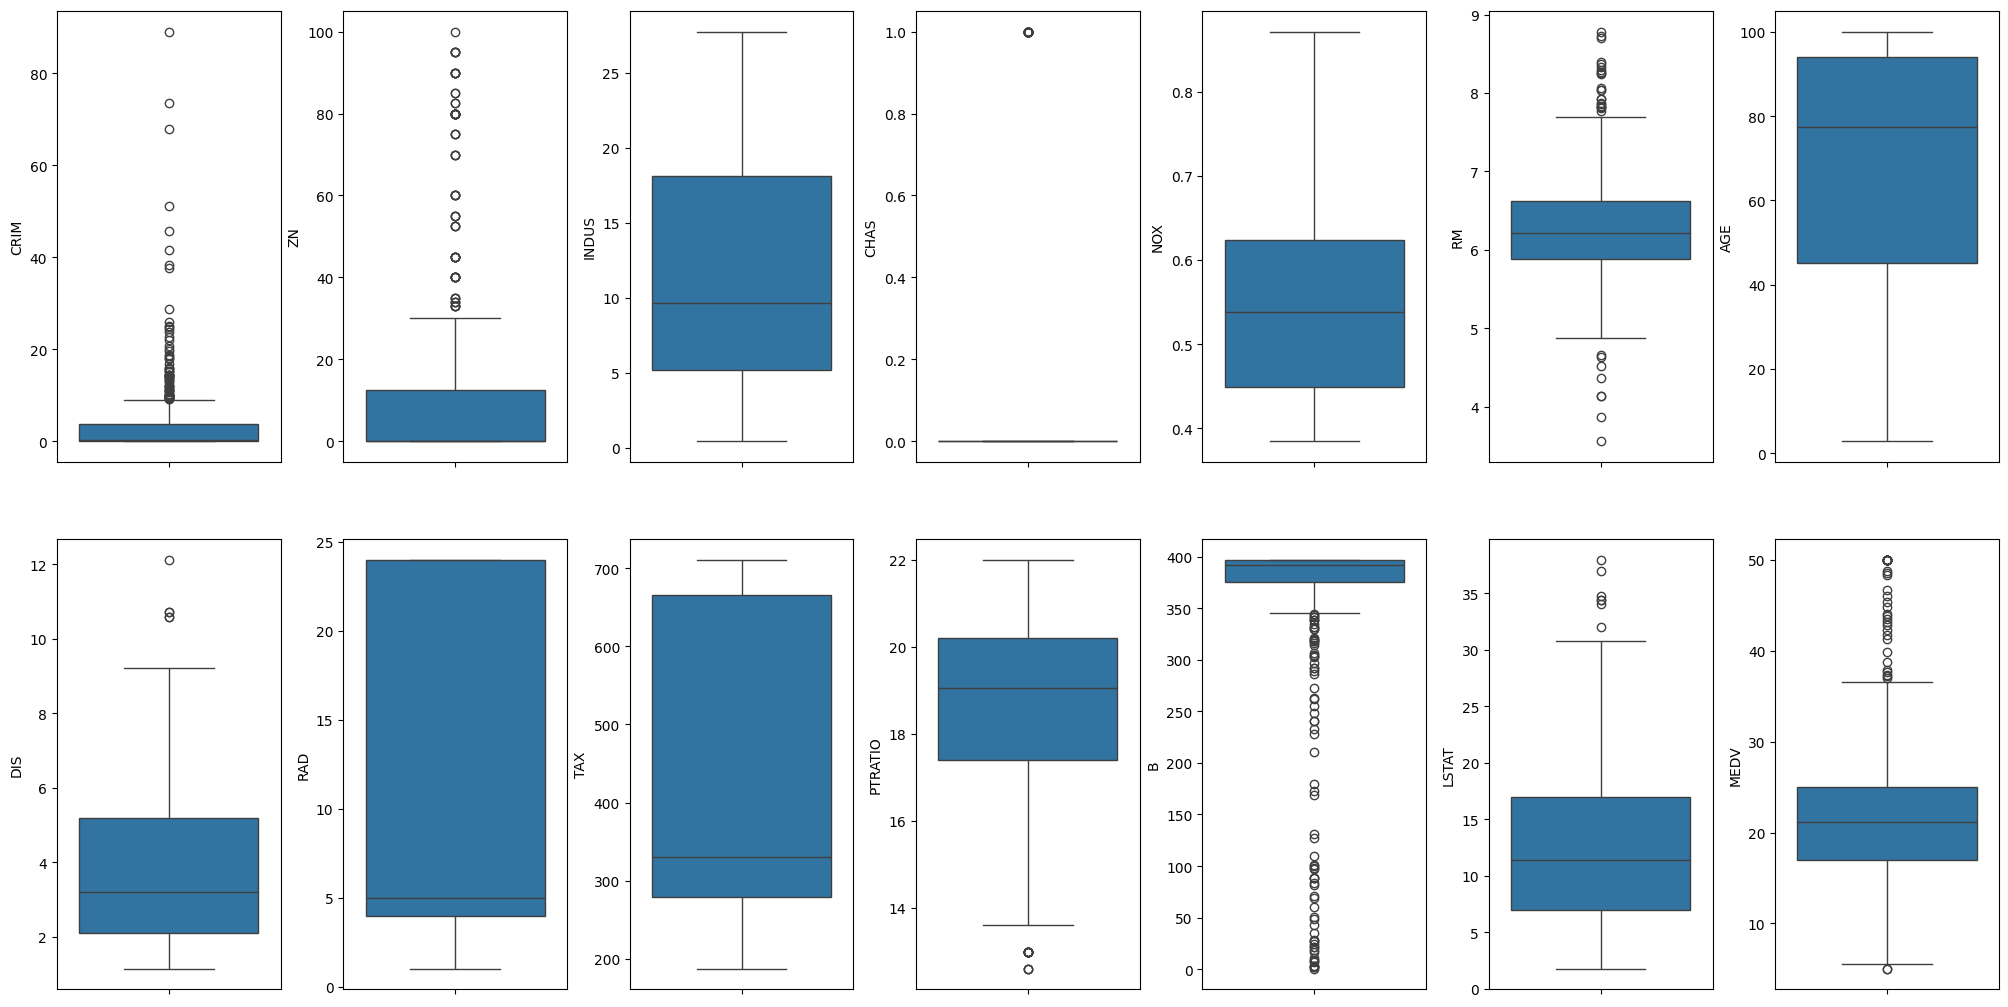

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20,10))
index = 0
axs = axs.flatten()
for k, v in df.items():
  sns.boxplot(y = k, data = df, ax = axs[index])
  index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [ ]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [ ]:
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

(490, 14)


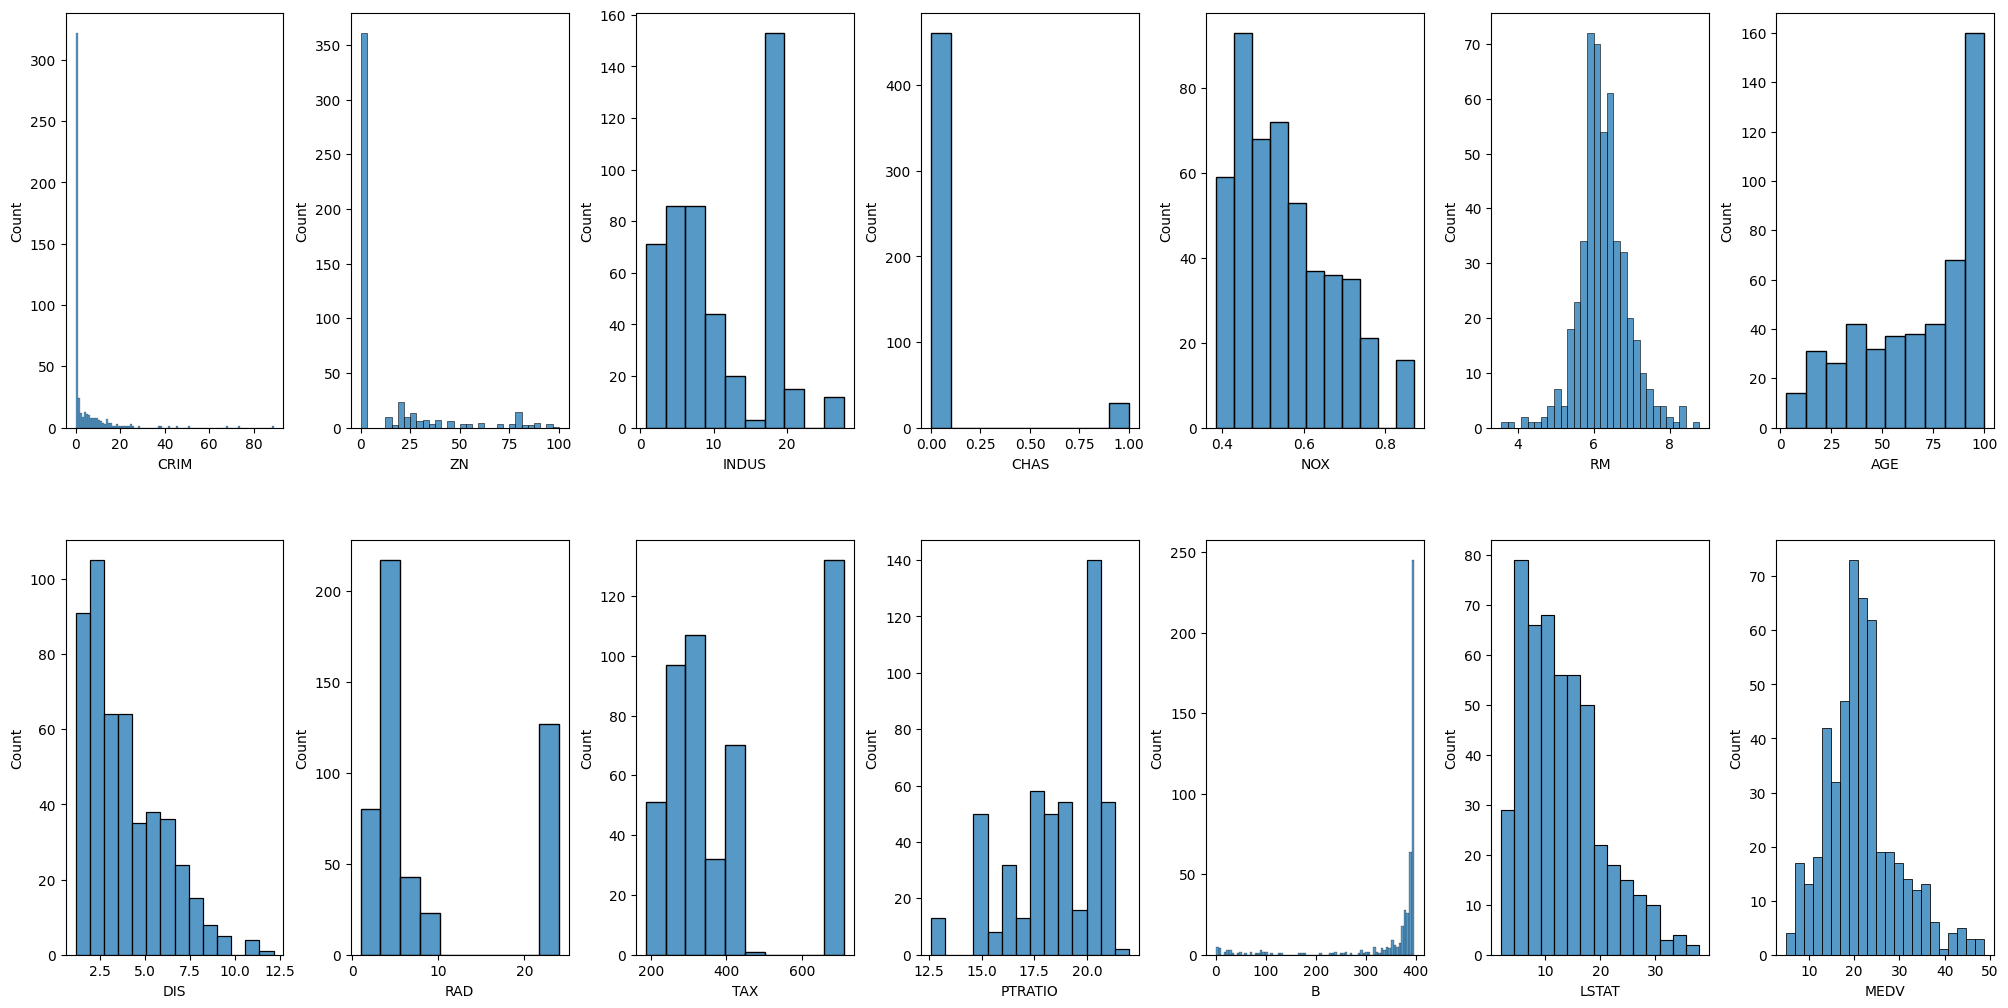

In [ ]:
fig, axs = plt.subplots(ncols = 7, nrows = 2 , figsize = (20,10))
index = 0
axs = axs.flatten()
for k, v in df.items():
  sns.histplot(v, ax = axs[index])
  index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

<Axes: >

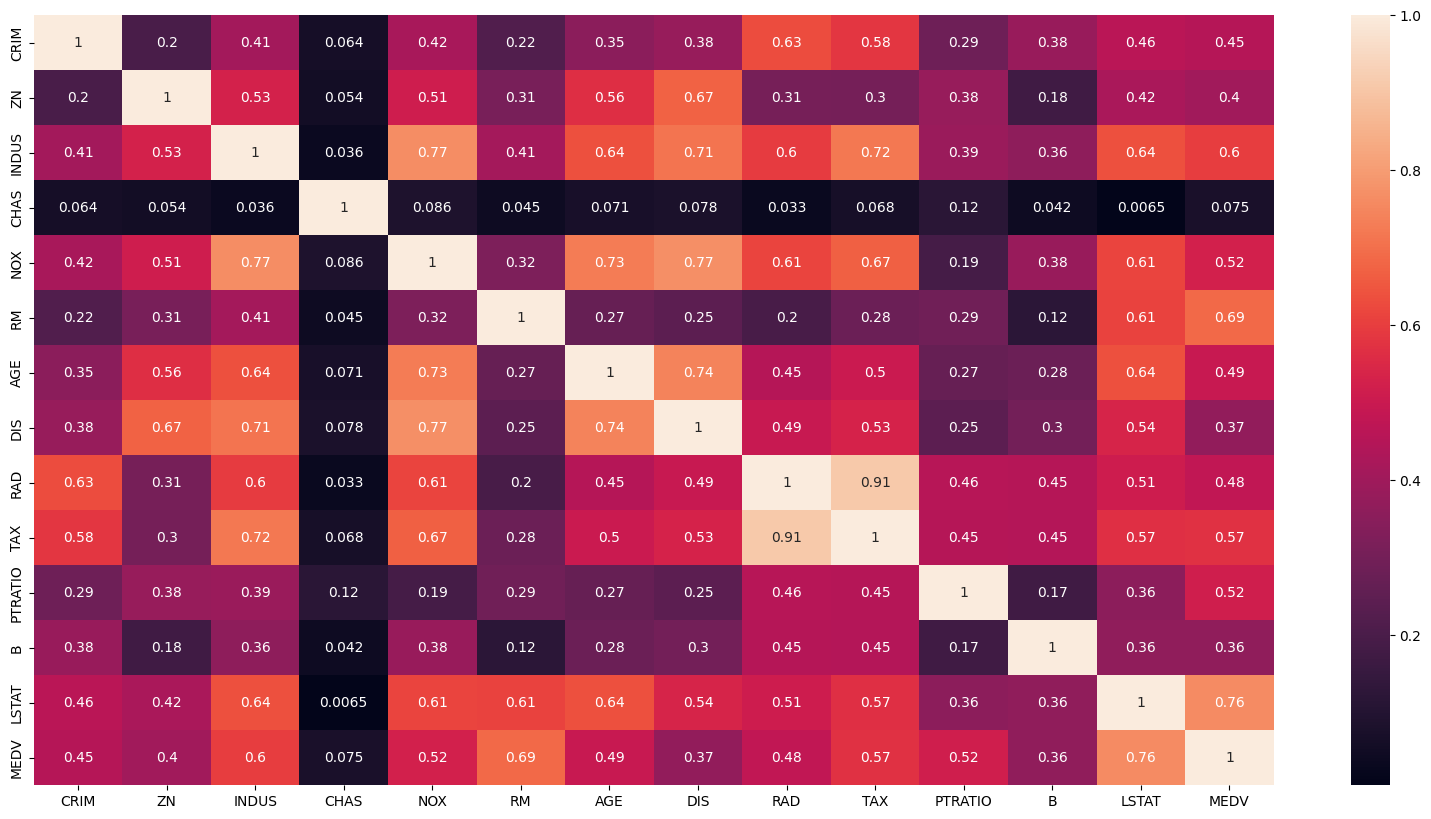

In [ ]:
plt.figure(figsize =(20, 10))
sns.heatmap(df.corr().abs(), annot = True)

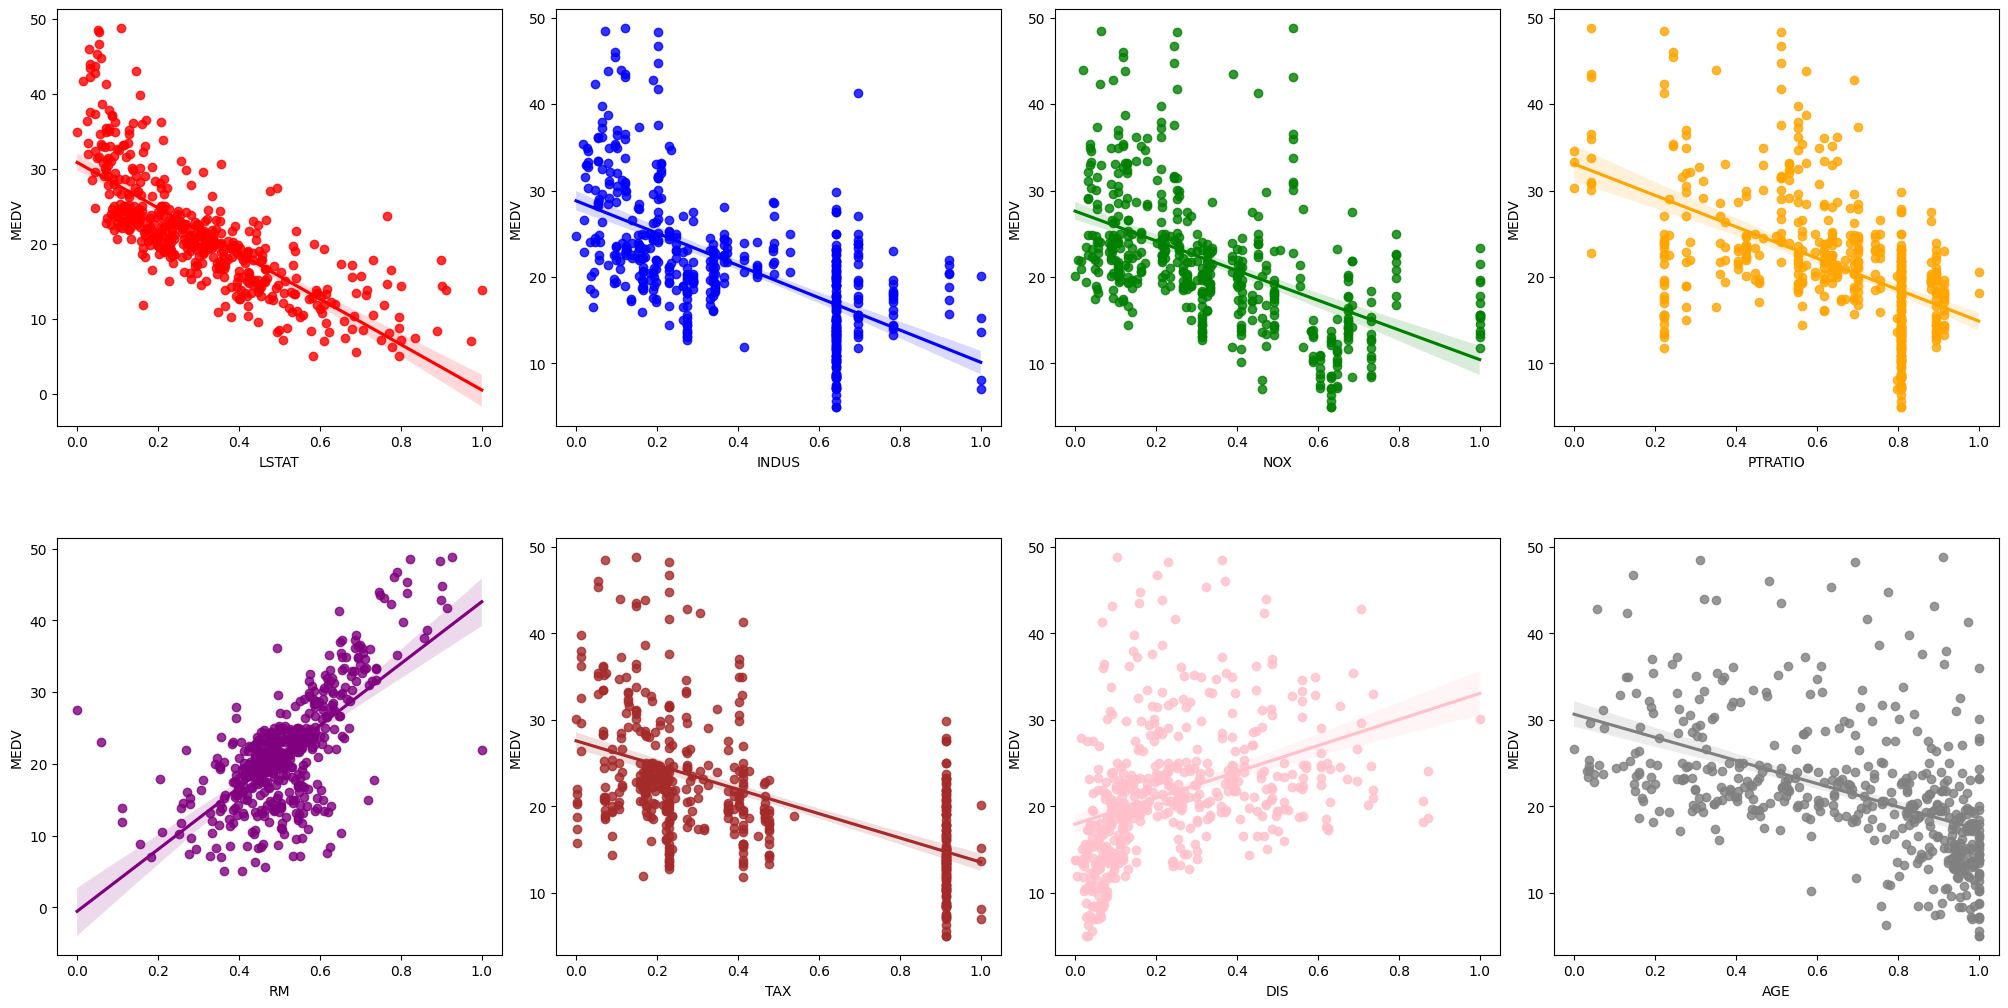

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:, column_sels]
y = df['MEDV']
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = column_sels)
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(y = y, x = x[k], ax = axs[i], color = colors[i])

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)


In [ ]:
y =  np.log1p(y)
for col in x.columns:
  if np.abs(x[col].skew()) > 0.3:
    x[col] = np.log1p(x[col])

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import KFold
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits = 10, shuffle = True)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

scores = cross_val_score(l_regression, x_scaled, y, scoring = 'neg_mean_squared_error', cv = kf, n_jobs = -1)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['Linear Regression'] = scores
l_ridge = linear_model.Ridge()
scores  = cross_val_score(l_ridge, x_scaled, y, scoring = 'neg_mean_squared_error', cv = kf, n_jobs = -1)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree = 3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, scoring = 'neg_mean_squared_error', cv = kf)
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)
MSE: -0.03 (+/- 0.01)
MSE: -0.02 (+/- 0.01)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

svb_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
scores = cross_val_score(svb_rbf, x_scaled, y, scoring = 'neg_mean_squared_error', cv = kf, n_jobs = -1)
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.02 (+/- 0.01)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.01)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores

print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.03 (+/- 0.01)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.02 (+/- 0.01)


Text(0.5, 0, 'MSE')

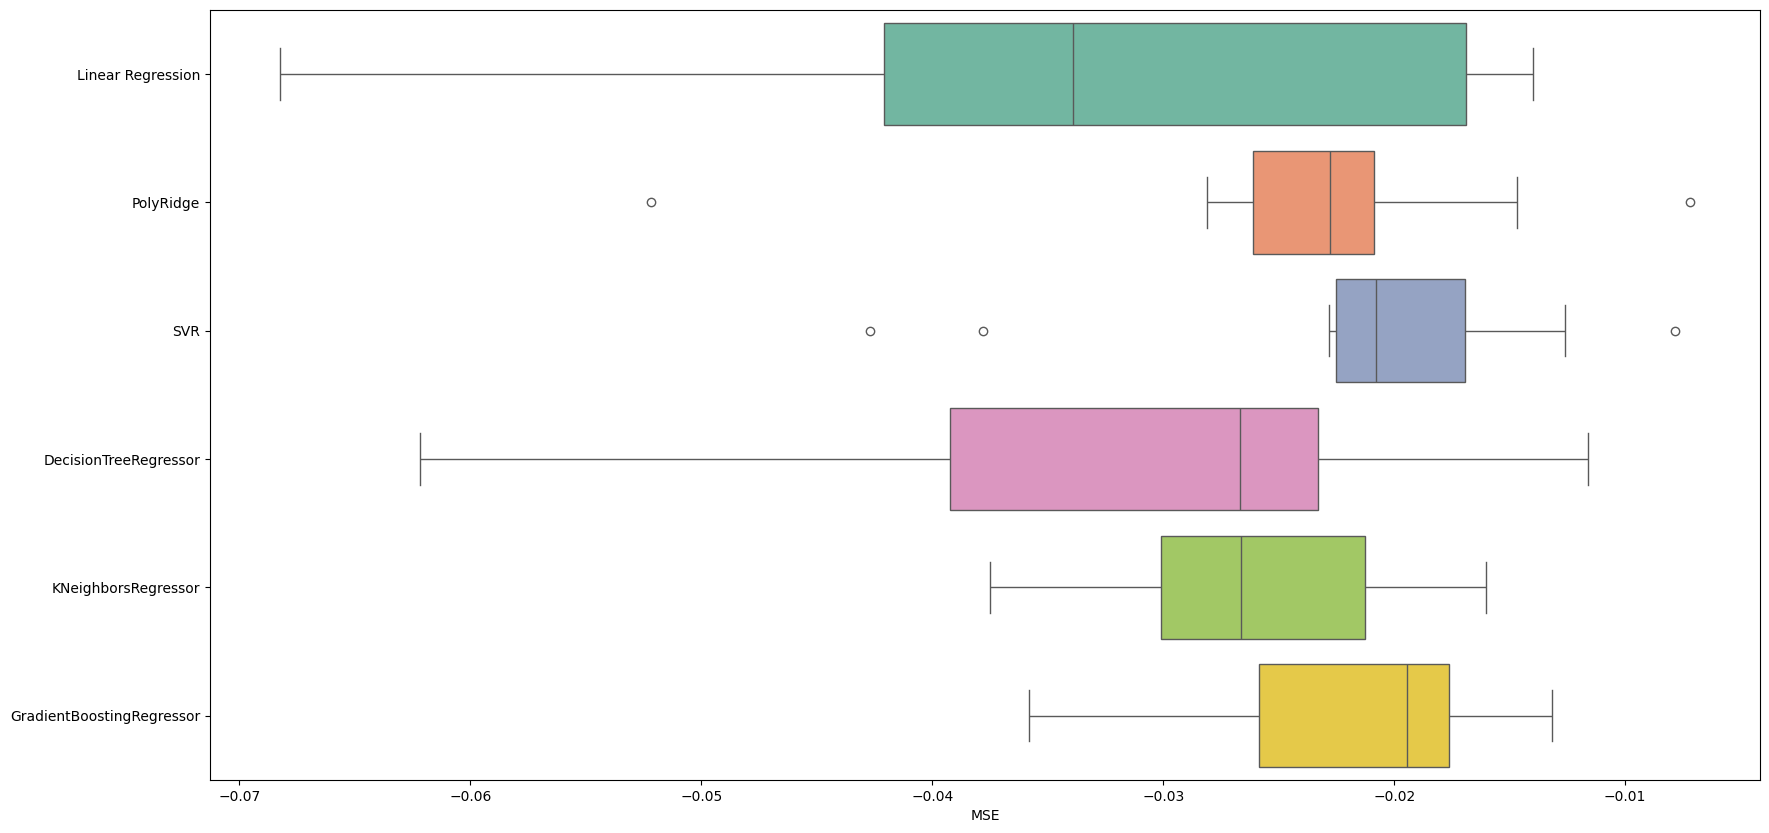

In [ ]:
plt.figure(figsize = (20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map, orient = 'h', palette = 'Set2')
plt.xlabel('MSE')